In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
categoricals = data.select_dtypes(object)
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


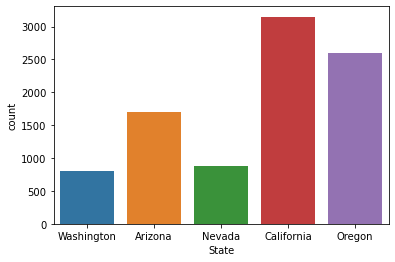

In [4]:
sns.countplot(x="State", data=categoricals)
plt.show()

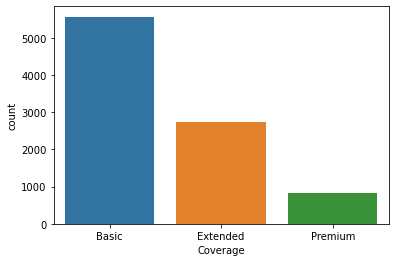

In [5]:
sns.countplot(x="Coverage", data=categoricals)
plt.show()

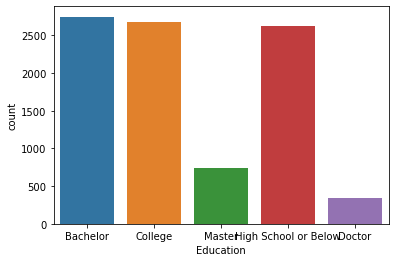

In [6]:
sns.countplot(x="Education", data=categoricals)
plt.show()


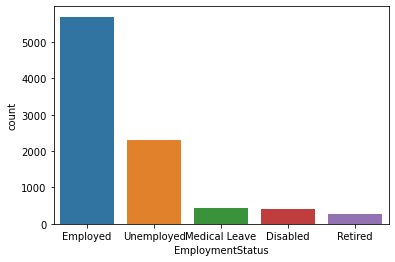

In [7]:
sns.countplot(x="EmploymentStatus", data=categoricals)
plt.show()

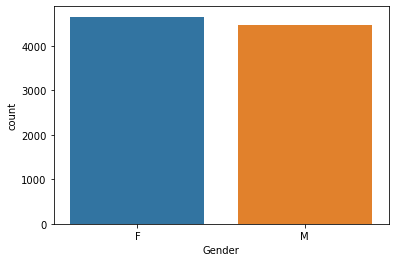

In [8]:
sns.countplot(x="Gender", data=categoricals)
plt.show()

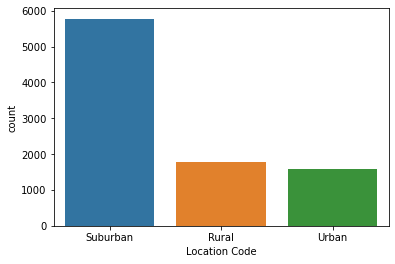

In [9]:
sns.countplot(x="Location Code", data=categoricals)
plt.show()

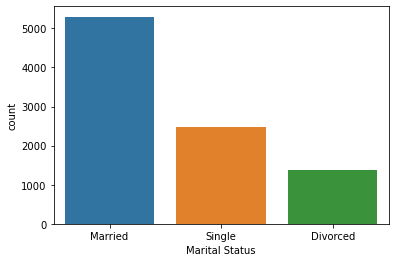

In [10]:
sns.countplot(x="Marital Status", data=categoricals)
plt.show()

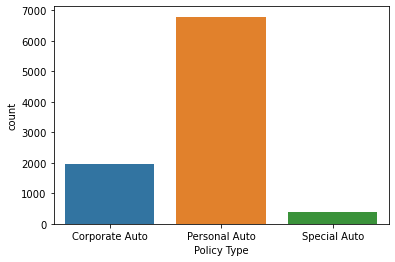

In [11]:
sns.countplot(x="Policy Type", data=categoricals)
plt.show()

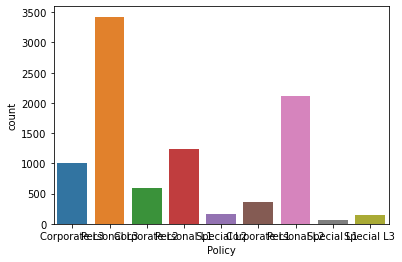

In [12]:
sns.countplot(x="Policy", data=categoricals)
plt.show()

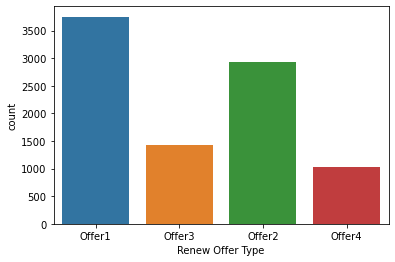

In [13]:
sns.countplot(x="Renew Offer Type", data=categoricals)
plt.show()

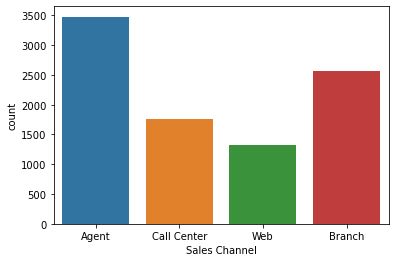

In [14]:
sns.countplot(x="Sales Channel", data=categoricals)
plt.show()

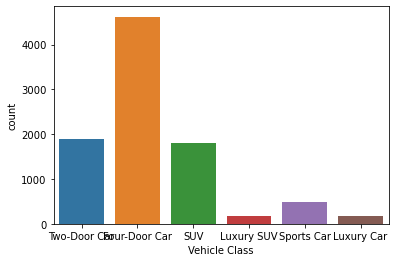

In [15]:
sns.countplot(x="Vehicle Class", data=categoricals)
plt.show()

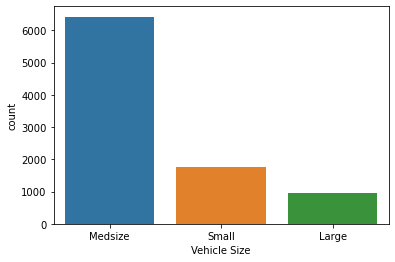

In [16]:
sns.countplot(x="Vehicle Size", data=categoricals)
plt.show()

In [17]:
display(categoricals['Policy Type'].value_counts())
display(categoricals['Policy'].value_counts())

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

As the columns "Policy" and "Policy Type" have the same type of information I would drop one of them

In [21]:
data['Effective To Date']=pd.to_datetime(data['Effective To Date'], format="%m/%d/%y")

In [22]:
useful_date=data.groupby(['Effective To Date']).agg({'Total Claim Amount':sum}).reset_index()
useful_date.head()

,Effective To Date,Total Claim Amount
0,2011-01-01,67480.593660
1,2011-01-02,68212.093124
2,2011-01-03,75794.120050
3,2011-01-04,51824.370553
4,2011-01-05,81574.155909


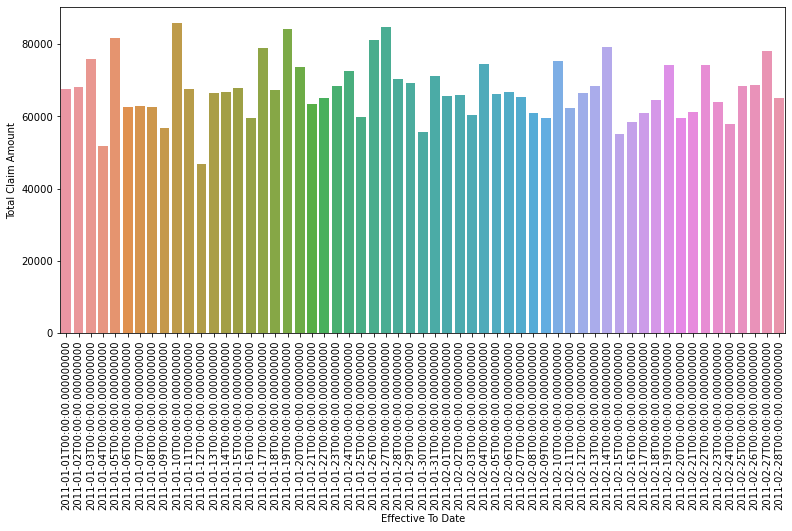

In [23]:
fig, ax = plt.subplots(figsize= [13,6])
sns.barplot(data = useful_date, x = 'Effective To Date', y = 'Total Claim Amount')
plt.xticks(rotation=90)
plt.show()

Just looking at raw dates there doesn't seem to be anything noticable regarding the sum of calimed amounts for a specific day